#Gaussian Naive Bayes

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('D:\Courses HK2 23-24\Machine Learning\LAB\Week 03\Customer_Behaviour.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\hnam\AppData\Local\Temp\ipykernel_4188\2418591630.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('D:\Courses HK2 23-24\Machine Learning\LAB\Week 03\Customer_Behaviour.csv')


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Data Analysis

In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [8]:
# Check Missing values
df[categorical_cols].isnull().sum()

Gender    0
dtype: int64

C:\Users\hnam\AppData\Local\Temp\ipykernel_4188\1893478611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])


C:\Users\hnam\AppData\Local\Temp\ipykernel_4188\1893478611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
C:\Users\hnam\AppData\Local\Temp\ipykernel_4188\1893478611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
C:\Users\hnam\AppData\Local\Temp\ipykernel_4188\1893478611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])


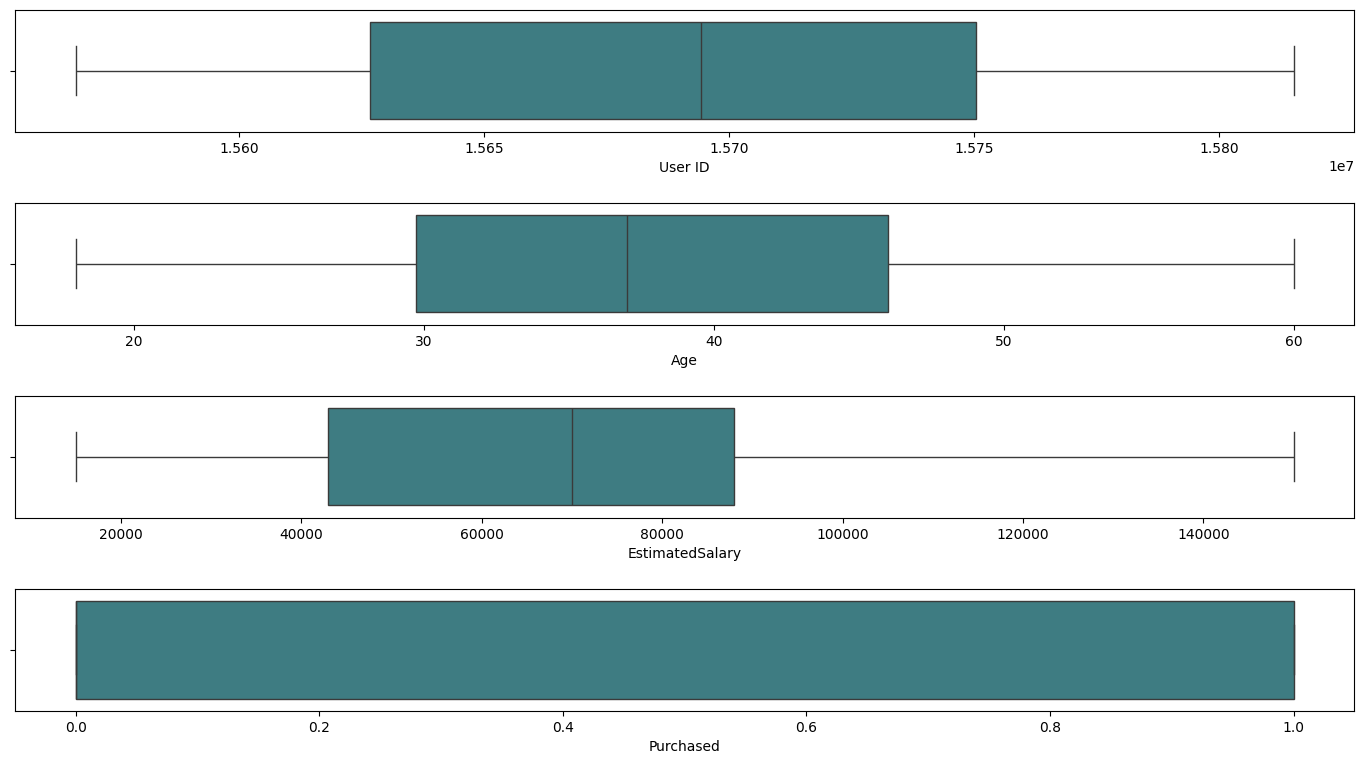

In [9]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

<Axes: xlabel='Purchased', ylabel='Count'>

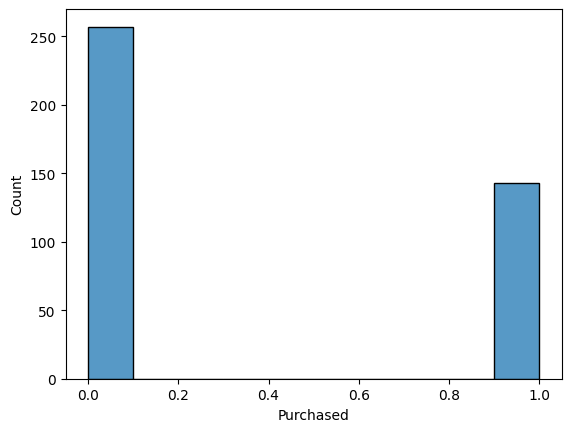

In [10]:
#Xem phân phối của EstimatedSalary
sns.histplot(x="Purchased", data=df)

In [11]:
# plt.figure(figsize=(10, 5))
# sns.heatmap(df.corr())

## Preprocessing

In [12]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    df.drop("User ID", axis=1, inplace=True)
    return df

In [13]:
df = preprocessing_data(df)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## Feature Engineering

<Axes: >

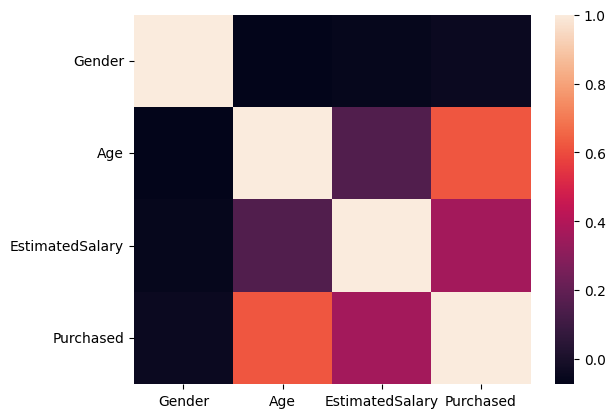

In [14]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    df["Gender"] = df["Gender"].astype("category").cat.codes
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

##Model Training

In [15]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    feature_names = df.columns.tolist()
    feature_names.remove("Purchased")

    X = df[feature_names].values
    y = df.Purchased.values
    return X, y

X, y = prepare_X_y(df)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
400*0.7

280.0

In [18]:
len(X_train)

280

In [19]:
# --- Without Scaler
from sklearn.naive_bayes import GaussianNB

# Model training
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

GaussianNB()

In [20]:
y_train.shape

(280,)

In [21]:
y_train.ravel()

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [23]:
predicted_label = naive_model.predict(X_test)

In [24]:
predicted_label

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [25]:
print(classification_report(y_test, predicted_label))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        72
           1       0.79      0.79      0.79        48

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120



In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)

# Model training
naive_model = GaussianNB()
naive_model.fit(X_normal_train, y_train.ravel())

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = naive_model.predict(X_normal_test)
print(classification_report(y_test, predicted_label))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87        72
           1       0.80      0.81      0.80        48

    accuracy                           0.84       120
   macro avg       0.83      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



In [27]:
# -- Build a full pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()

# set the tolerance to a large value to make the example faster
gau_nb = GaussianNB()
pipe = Pipeline(steps=[("scaler", scaler), ("gau_nb", gau_nb)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
var_smoothing_values = np.logspace(-4, -9, num=100)
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    'gau_nb__var_smoothing': var_smoothing_values
    }

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)



from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

Best parameter (CV score=0.896):
{'gau_nb__var_smoothing': 0.0001, 'scaler__feature_range': (-1, 1)}
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        72
           1       0.80      0.81      0.80        48

    accuracy                           0.84       120
   macro avg       0.83      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



In [28]:
def build_model(X, y):
    # Define a Standard Scaler to normalize inputs
    scaler = MinMaxScaler()

    # set the tolerance to a large value to make the example faster
    gau_nb = GaussianNB()
    pipe = Pipeline(steps=[("scaler", scaler), ("gau_nb", gau_nb)]) #Build a pipeline with a scaler and a model

    # Parameters of pipelines can be set using '__' separated parameter names:
    var_smoothing_values = np.logspace(-4, -9, num=100)
    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'gau_nb__var_smoothing': var_smoothing_values
        }

    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X, y)

    return search

naive_model = build_model(X, y) # Why?